In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [3]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featur

# this is how i will specify what i am looking for within the page. 

In [4]:
soup.find_all('table')[1] # THIS FINDS THE 2ND TABLE ON THE PAGE AND EVERYTHING WITHIN IT.


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [5]:
soup.find('table', class_ = 'wikitable sortable') # this works cus it's the FIRST table on the page with that class name. because another table has this exact class name. so the find
# tool only brings up the first of it's kind thats why this is okay to use.



<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [6]:
table = soup.find_all('table')[1]

In [7]:
print(table) # column titles have 'th' tags

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [8]:
world_titles = table.find_all('th')

In [10]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [9]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(columns = world_table_titles) # make sure dataframe has upper case on 'D' and 'F' otherwise wont work.

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [12]:
column_data = table.find_all('tr')

In [13]:
for row in column_data[1:]: # the 1 here gets rid of that original empty row above the data.
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
 
    length = len(df)
    df.loc[length] = individual_row_data


In [14]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [2]:
#df.to_csv(r'C:/Users/Simon/Desktop/Python Learning 2024/Companies.csv', index = False) # this is how you put what you scraped into a csv document


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.dtypes
pd.set_option('display.max_rows', None) #allows me to see all rows.

In [17]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology and cloud computing,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


In [33]:
df['Employees'] = df['Employees'].str.replace(',', '')
#df['Employees'].str.replace('[2]', '')


In [36]:
df['Employees'] = df['Employees'].str.replace('[2]', '')
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,400000,"Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4,259500,"Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4,383000,"Omaha, Nebraska"
7,8,Alphabet,Technology and cloud computing,"282,836",9.8,156000,"Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8,48500,"Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6,43846,"San Ramon, California"


In [26]:
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '')
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,400000,"Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4,259500,"Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4,383000,"Omaha, Nebraska"
7,8,Alphabet,Technology and cloud computing,"282,836",9.8,156000,"Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8,48500,"Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6,43846,"San Ramon, California"


In [41]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','.')
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611.289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513.983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413.680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394.328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324.162,12.7,400000,"Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,322.467,10.4,259500,"Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,302.089,9.4,383000,"Omaha, Nebraska"
7,8,Alphabet,Technology and cloud computing,282.836,9.8,156000,"Mountain View, California"
8,9,McKesson Corporation,Health,276.711,4.8,48500,"Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,246.252,51.6,43846,"San Ramon, California"


In [42]:
df.dtypes

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object

In [47]:
df['Employees']= df['Employees'].astype(int)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(float)
df['Revenue growth'] = df['Revenue growth'].astype(float)

In [88]:
df[df['Revenue (USD millions)'] >= 240]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611.289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513.983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413.680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394.328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324.162,12.7,400000,"Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,322.467,10.4,259500,"Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,302.089,9.4,383000,"Omaha, Nebraska"
7,8,Alphabet,Technology and cloud computing,282.836,9.8,156000,"Mountain View, California"
8,9,McKesson Corporation,Health,276.711,4.8,48500,"Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,246.252,51.6,43846,"San Ramon, California"


In [89]:
df2 = df[df['Revenue (USD millions)'] >= 240]

([<matplotlib.patches.Wedge at 0x24bcacefc50>,
 [Text(-1.0827400275126846, 0.19409799798511962, 'Walmart'),
  Text(-0.7810565715346206, -0.7745648017193811, 'Amazon'),
  Text(0.000763826788467408, -1.0999997348038941, 'ExxonMobil'),
  Text(0.6993653633972033, -0.8490512873085453, 'Apple'),
  Text(1.0602372795482722, -0.2930817480773562, 'UnitedHealth Group'),
  Text(1.0568075024368042, 0.3052177956693944, 'CVS Health'),
  Text(0.7558847852184057, 0.7991484164254626, 'Berkshire Hathaway'),
  Text(0.28203660392888613, 1.0632287402267966, 'Alphabet'),
  Text(-0.23723831051053185, 1.0741126495978477, 'McKesson Corporation'),
  Text(-0.6769331578182463, 0.867041809745192, 'Chevron Corporation')],
 [Text(-0.5905854695523733, 0.10587163526461069, '16.6%'),
  Text(-0.4260308572007021, -0.42248989184693514, '13.9%'),
  Text(0.0004166327937094952, -0.5999998553475785, '11.2%'),
  Text(0.38147201639847456, -0.4631188839864792, '10.7%'),
  Text(0.5783112433899666, -0.15986277167855792, '8.8%'),
  

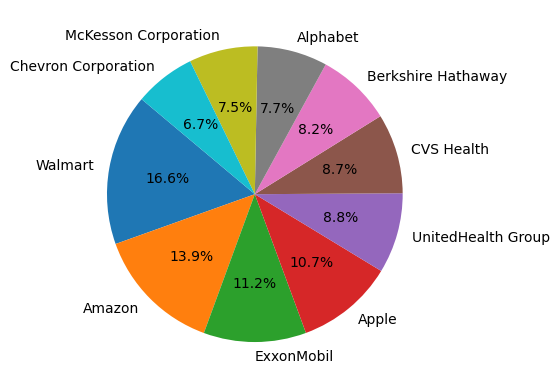

In [97]:
plt.pie(df2['Revenue (USD millions)'], labels=df2['Name'], autopct='%1.1f%%', startangle=140)